In [83]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot
from ipywidgets import interact, widgets
%matplotlib widget

In [84]:
## Load Data
initPlot()

In [88]:
datatype =  "SLICS"#"MS"#"SLICS" #"MS" 

if datatype=="MS":
    dir_data="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"

    Map2=np.loadtxt(dir_data+"map_squared_our_thetas/map_squared.dat")
    Cov_Gauss_infinity=np.loadtxt(dir_data+"covMap2_infinite_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    Cov_Gauss_square=np.loadtxt(dir_data+"covMap2_square_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    Cov_NonGauss_infinity=np.loadtxt(dir_data+"covMap2_infinite_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
    Cov_NonGauss_square=np.loadtxt(dir_data+"covMap2_square_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
elif datatype=="SLICS":
    dir_data="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS/"

    Map2=np.loadtxt(dir_data+"map_squared").T
    Cov_Gauss_infinity=np.loadtxt(dir_data+"covMap2_infinite_Gauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    Cov_Gauss_square=np.loadtxt(dir_data+"covMap2_square_Gauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")
    Cov_NonGauss_infinity=np.loadtxt(dir_data+"covMap2_infinite_NonGauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")*4
    Cov_NonGauss_square=np.loadtxt(dir_data+"covMap2_square_NonGauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")*4



Nlos=len(Map2[0])


Cov_FFT=np.cov(Map2)

Cov_FFT_parts=np.array([np.cov(Map2[:,:Nlos//4]), np.cov(Map2[:,Nlos//4:Nlos//2]), np.cov(Map2[:,Nlos//2:3*Nlos//4]), np.cov(Map2[:,3*Nlos//4:])])
Cov_FFT_std=np.std(Cov_FFT_parts, axis=0)


In [86]:
thetas_ind = np.array([2,4, 8, 16])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

interactive(children=(IntSlider(value=1, description='bin_ix', max=3), Checkbox(value=True, description='plotF…

<function __main__.updateCov(bin_ix, plotFFT=True, showStdFFT=True, plotFFTLOS=False, plotGaussInf=True, plotGaussSquare=True, plotNonGaussInf=True, plotNonGaussSquare=True, plotSumInf=True, plotSumSquare=True)>

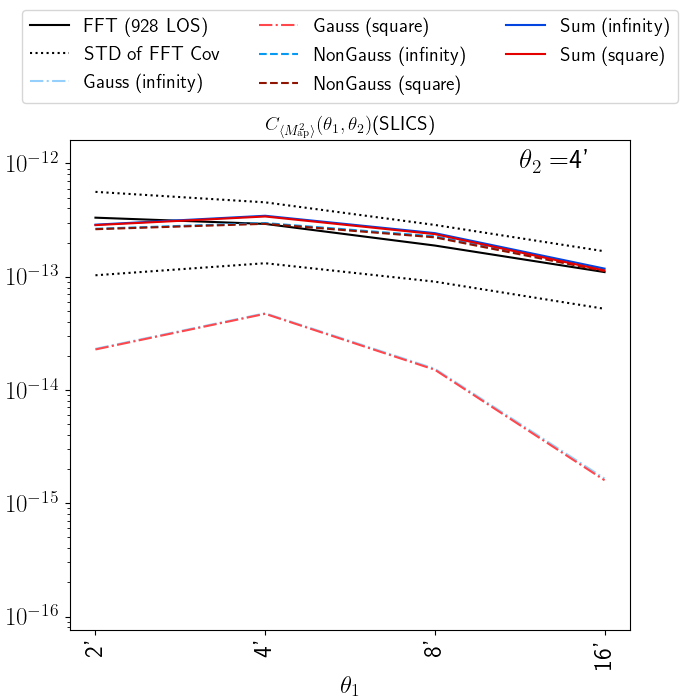

In [89]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_axes([0.1, 0.1, 0.8, 0.7])

ax.set_yscale('log')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)


ax.set_title(r"$C_{\langle M_\mathrm{ap}^2\rangle}(\theta_1, \theta_2)$"+f"({datatype})")


ax.set_xlabel(r"$\theta_1$")
if(datatype=="SLICS"):
    thetaText=ax.text(2.5, 9e-13, r"$\theta_2=$"+thetas_labels[0])
elif(datatype=="MS"):
    thetaText=ax.text(2.5, 4e-12, r"$\theta_2=$"+thetas_labels[0])
line,=ax.plot(Cov_FFT[0], label=f'FFT ({Nlos} LOS)', color='k')
line_l, = ax.plot(Cov_FFT[0]-Cov_FFT_std[0], color='k', ls=':', label=f'STD of FFT Cov')
line_u, = ax.plot(Cov_FFT[0]+Cov_FFT_std[0], color='k', ls=':')

lines=[]
for cov in Cov_FFT_parts:
    line2,=ax.plot(cov[0], color='k', ls='-', alpha=0.2)
    lines.append(line2)

GaussInf,=ax.plot(Cov_Gauss_infinity[0], label='Gauss (infinity)', ls='-.', color='xkcd:light blue')
GaussSquare,=ax.plot(Cov_Gauss_square[0], label='Gauss (square)', ls='-.', color='xkcd:light red')
NonGaussInf,=ax.plot(Cov_NonGauss_infinity[0], label='NonGauss (infinity)', ls='--', color="xkcd:azure")
NonGaussSquare,=ax.plot(Cov_NonGauss_square[0], label='NonGauss (square)', ls='--', color='xkcd:brick red')

SumInf,=ax.plot(Cov_Gauss_infinity[0]+Cov_NonGauss_infinity[0], label=r'Sum (infinity)', color='xkcd:blue', ls='-')
SumSquare,=ax.plot(Cov_Gauss_square[0]+Cov_NonGauss_square[0], label=r'Sum (square)', color='xkcd:red', ls='-')

fig.legend(ncol=3, loc='upper center',  bbox_to_anchor=(0.5, 1))

Cov_Sum_infinity=Cov_Gauss_infinity+Cov_NonGauss_infinity
Cov_Sum_square=Cov_Gauss_square+Cov_NonGauss_square

def updateCov(bin_ix, plotFFT=True, showStdFFT=True, plotFFTLOS=False, plotGaussInf=True, plotGaussSquare=True, plotNonGaussInf=True, plotNonGaussSquare=True, plotSumInf=True, plotSumSquare=True):
    thetaText.set_text(r"$\theta_2=$"+thetas_labels[bin_ix])

    if(plotFFT):
        line.set_ydata(Cov_FFT[bin_ix])
    else:
        line.set_ydata(np.nan*np.ones_like(Cov_FFT[bin_ix]))


    if(showStdFFT):
        line_l.set_ydata(Cov_FFT[bin_ix]-Cov_FFT_std[bin_ix])
        line_u.set_ydata(Cov_FFT[bin_ix]+Cov_FFT_std[bin_ix])
    else:
        line_l.set_ydata(np.nan*np.ones_like(Cov_FFT[bin_ix]-Cov_FFT_std[bin_ix]))
        line_u.set_ydata(np.nan*np.ones_like(Cov_FFT[bin_ix]+Cov_FFT_std[bin_ix]))

    if(plotFFTLOS):
        for i, l in enumerate(lines):
            l.set_ydata(Cov_FFT_parts[i][bin_ix])
    else:
        for i, l in enumerate(lines):
            l.set_ydata(np.nan*np.ones_like(Cov_FFT_parts[i][bin_ix]))


    if(plotGaussInf):
        GaussInf.set_ydata(Cov_Gauss_infinity[bin_ix])
    else:
        GaussInf.set_ydata(np.nan*np.ones_like(Cov_Gauss_infinity[bin_ix]))

    if(plotNonGaussInf):
        NonGaussInf.set_ydata(Cov_NonGauss_infinity[bin_ix])
    else:
        NonGaussInf.set_ydata(np.nan*np.ones_like(Cov_NonGauss_infinity[bin_ix]))


    if(plotGaussSquare):
        GaussSquare.set_ydata(Cov_Gauss_square[bin_ix])
    else:
        GaussSquare.set_ydata(np.nan*np.ones_like(Cov_Gauss_square[bin_ix]))

    if(plotNonGaussSquare):
        NonGaussSquare.set_ydata(Cov_NonGauss_square[bin_ix])
    else:
        NonGaussSquare.set_ydata(np.nan*np.ones_like(Cov_NonGauss_square[bin_ix]))


    if(plotSumInf):
        SumInf.set_ydata(Cov_Sum_infinity[bin_ix])
    else:
        SumInf.set_ydata(np.nan*np.ones_like(Cov_Sum_infinity[bin_ix]))


    if(plotSumSquare):
        SumSquare.set_ydata(Cov_Sum_square[bin_ix])
    else:
        SumSquare.set_ydata(np.nan*np.ones_like(Cov_Sum_square[bin_ix]))



    fig.canvas.draw_idle()



interact(updateCov, bin_ix=(0, N-1))
